In [123]:
with open('./output.txt', 'r') as file:
    data = file.readlines()

combo_util_dict = {}
single_item_util_dict = {}
single_category_util_dict = {}

for line in data:
    tokens = line.split()
    if len(tokens) >= 4 and tokens[2] == "#UTIL:":
        util_index = tokens.index("#UTIL:")
        combo_items = " ".join(tokens[:util_index])
        util_value = float(tokens[util_index + 1])
        combo_util_dict[combo_items] = util_value
    elif len(tokens) == 3 and tokens[1] == "#UTIL:":
        item_or_category = int(tokens[0])
        util_value = float(tokens[2])
        if item_or_category < 32341:
            single_item_util_dict[item_or_category] = util_value
        else:
            single_category_util_dict[item_or_category] = util_value

sorted_single_items = sorted(single_item_util_dict.items(), key=lambda x: x[1], reverse=True)
top_5_single_items = sorted_single_items[:5]

sorted_single_categories = sorted(single_category_util_dict.items(), key=lambda x: x[1], reverse=True)
top_5_single_categories = sorted_single_categories[:5]

sorted_combos = sorted(combo_util_dict.items(), key=lambda x: x[1], reverse=True)

top_5_combos_with_items = [(combo, util) for combo, util in sorted_combos if all(int(item) < 32341 for item in combo.split())]
top_5_combos_with_categories = [(combo, util) for combo, util in sorted_combos if all(int(item) >= 32340 for item in combo.split())]

top_5_combos_with_items = top_5_combos_with_items[:5]
top_5_combos_with_categories = top_5_combos_with_categories[:5]

print("Top 5 single items producing most utilities:")
for item, util in top_5_single_items:
    print(f"Item: {item}, Utility: {util}")

print("\nTop 5 single categories producing most utilities:")
for category, util in top_5_single_categories:
    print(f"Category: {category}, Utility: {util}")

print("\nTop 5 combos of items producing most utilities:")
for combo, util in top_5_combos_with_items:
    print(f"Combo of Items: {combo}, Utility: {util}")

print("\nTop 5 combos of categories producing most utilities:")
for combo, util in top_5_combos_with_categories:
    print(f"Combo of Categories: {combo}, Utility: {util}")

Top 5 single items producing most utilities:
Item: 11145, Utility: 107520.0
Item: 23651, Utility: 77085.0
Item: 13814, Utility: 59540.0
Item: 8457, Utility: 57402.0
Item: 20927, Utility: 54165.0

Top 5 single categories producing most utilities:
Category: 32385, Utility: 1380594.0
Category: 32414, Utility: 1268585.0
Category: 32357, Utility: 1264222.0
Category: 32349, Utility: 1210529.0
Category: 32409, Utility: 1129948.0

Top 5 combos of items producing most utilities:
Combo of Items: 15912 26156, Utility: 10060.0
Combo of Items: 9130 1743, Utility: 9628.0
Combo of Items: 28970 7003, Utility: 8166.0
Combo of Items: 6201 18288, Utility: 7211.0
Combo of Items: 30958 10187, Utility: 6456.0

Top 5 combos of categories producing most utilities:
Combo of Categories: 32381 32349, Utility: 16584.0
Combo of Categories: 32389 32349, Utility: 9713.0
Combo of Categories: 32384 32381, Utility: 9065.0
Combo of Categories: 32391 32349, Utility: 6008.0
Combo of Categories: 32348 32362, Utility: 5757.

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

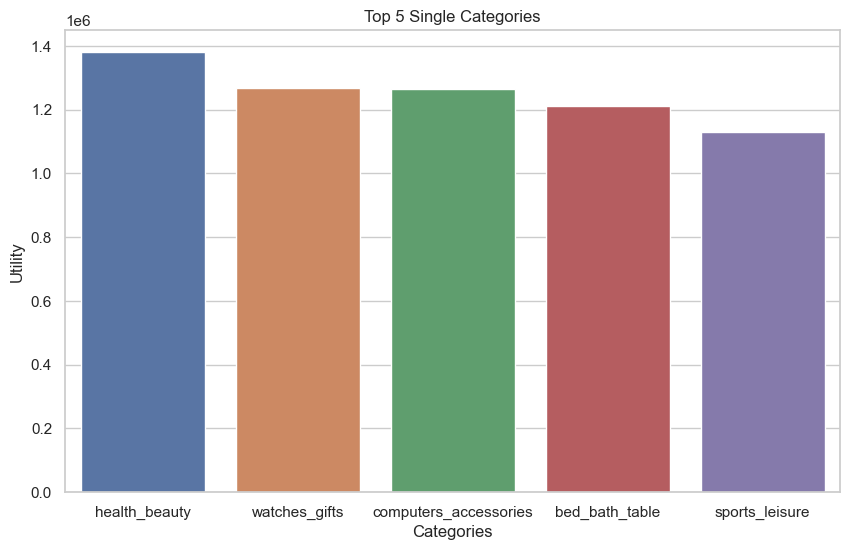

In [125]:
category_names = ['health_beauty', 'watches_gifts', 'computers_accessories', 'bed_bath_table', 'sports_leisure']

df = pd.DataFrame(top_5_single_categories, columns=['Category', 'Utility'])
df['Category Name'] = category_names

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Category Name', y='Utility', data=df)
plt.xlabel('Categories')
plt.ylabel('Utility')
plt.title('Top 5 Single Categories')
plt.savefig('./imgs/cats.png', dpi=300, bbox_inches='tight')
plt.show()

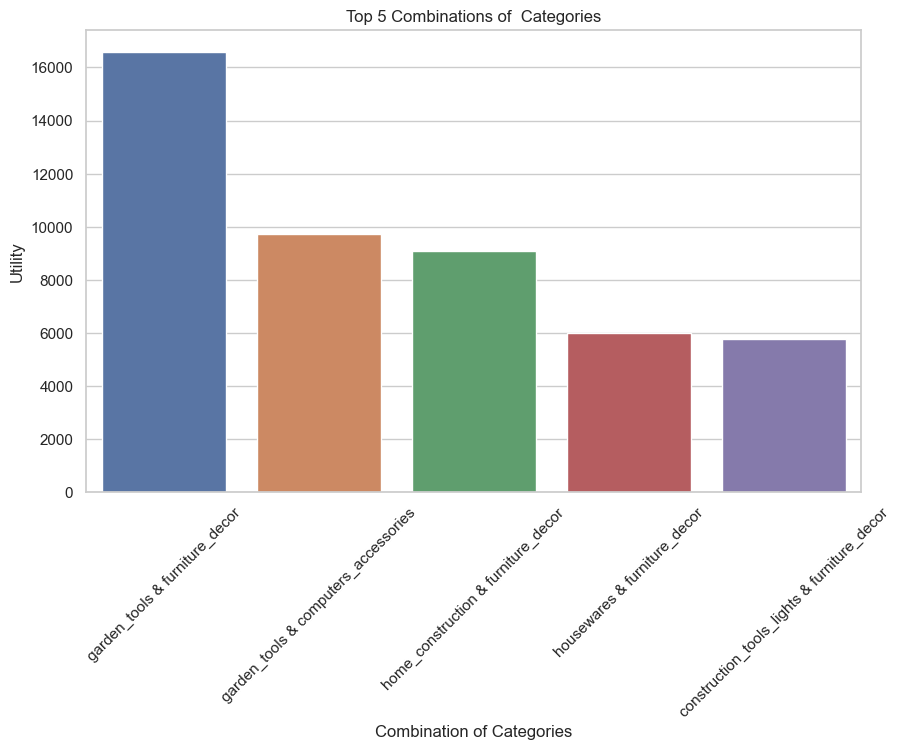

In [126]:
category_names = ['garden_tools & furniture_decor', 'garden_tools & computers_accessories', 'home_construction & furniture_decor', 'housewares & furniture_decor', 'construction_tools_lights & furniture_decor']

df = pd.DataFrame(top_5_combos_with_categories, columns=['Categories', 'Utility'])
df['Category Name'] = category_names

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Category Name', y='Utility', data=df)
plt.xlabel('Combination of Categories')
plt.ylabel('Utility')
plt.title('Top 5 Combinations of  Categories')
plt.xticks(rotation=45)
plt.savefig('./imgs/cat_combos.png', dpi=300, bbox_inches='tight')
plt.show()


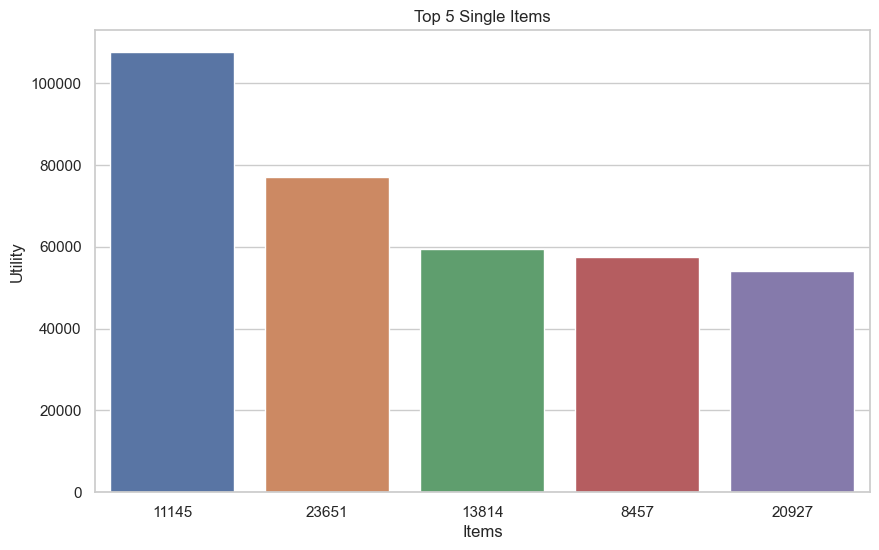

In [127]:
df = pd.DataFrame(top_5_single_items, columns=['Item', 'Utility'])
df['Item'] = df['Item'].apply(lambda x: str(x))

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Item', y='Utility', data=df)
plt.xlabel('Items')
plt.ylabel('Utility')
plt.title('Top 5 Single Items')
plt.savefig('./imgs/items.png', dpi=300, bbox_inches='tight')
plt.show()

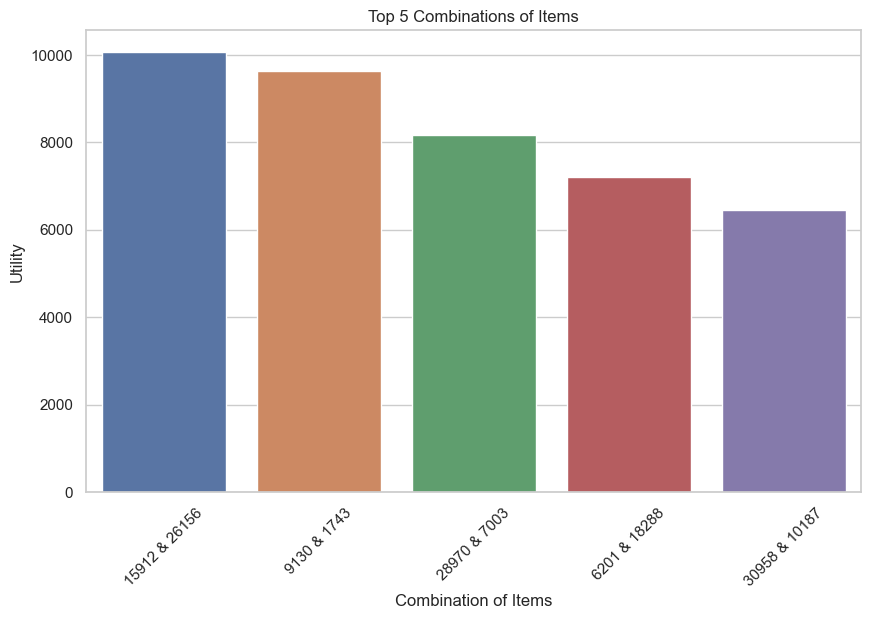

In [128]:
df = pd.DataFrame(top_5_combos_with_items, columns=['Itemset', 'Utility'])
df['Itemset'] = df['Itemset'].apply(lambda x: str(x).replace(' ', ' & '))

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Itemset', y='Utility', data=df)
plt.xlabel('Combination of Items')
plt.ylabel('Utility')
plt.title('Top 5 Combinations of Items')
plt.xticks(rotation=45)
plt.savefig('./imgs/item_combos.png', dpi=300, bbox_inches='tight')
plt.show()
